- https://www.learndatasci.com/tutorials/python-finance-part-yahoo-finance-api-pandas-matplotlib/
- https://www.learndatasci.com/tutorials/python-finance-part-2-intro-quantitative-trading-strategies/
- https://www.learndatasci.com/tutorials/python-finance-part-3-moving-average-trading-strategy/

In [46]:
import numpy as np
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd

- https://pandas-datareader.readthedocs.io/en/latest/remote_data.html

In [30]:
tickers = ['AAPL', 'MSFT', 'SPY']

start_date = '2020-01-01'
end_date = '2024-01-10'

panel_data = data.DataReader(tickers, 'stooq', start_date, end_date)
panel_data.head()

Attributes   Close                      High                       Low  \
Symbols       AAPL    MSFT     SPY      AAPL    MSFT       SPY    AAPL   
Date                                                                     
2024-01-10  186.15  382.77  476.51  186.4000  384.17  477.4481  183.92   
2024-01-09  185.14  375.79  473.88  185.1500  375.99  474.9300  182.73   
2024-01-08  185.56  374.69  474.60  185.6000  375.20  474.7500  181.50   
2024-01-05  181.18  367.75  467.92  182.7600  372.06  470.4400  180.17   
2024-01-04  181.91  367.94  467.28  183.0872  373.10  470.9600  180.88   

Attributes                     Open                       Volume              \
Symbols       MSFT     SPY     AAPL     MSFT     SPY        AAPL        MSFT   
Date                                                                           
2024-01-10  376.32  473.87  184.350  376.370  474.16  46719534.0  25466164.0   
2024-01-09  371.19  471.35  183.920  372.010  471.87  42841809.0  20829953.0   
2024-01-08  369.01  468.30  182.085  369.300  468.43  59144470.0  23133967.0   
2024-01-05  366.50  466.43  181.990  368.970  467.49  62379661.0  21004575.0   
2024-01-04  367.17  467.05  182.150  370.665  468.30  71983570.0  20901502.0   

Attributes              
Symbols            SPY  
Date                    
2024-01-10  67213015.0  
2024-01-09  65931439.0  
2024-01-08  74879074.0  
2024-01-05  86118913.0  
2024-01-04  84232169.0

In [31]:
close = panel_data['Close']

all_weekdays = pd.date_range(start=start_date, end=end_date, freq='B')

close = close.reindex(all_weekdays)

close = close.fillna(method='ffill')

close.head()

Symbols,AAPL,MSFT,SPY
2020-01-01,NaN,NaN,NaN
2020-01-02,73.5616,156.133,311.097
2020-01-03,72.8488,154.216,308.737
2020-01-06,73.4250,154.613,309.907
2020-01-07,73.0831,153.183,309.044


In [21]:
print(all_weekdays)

DatetimeIndex(['2010-01-01', '2010-01-04', '2010-01-05', '2010-01-06',
               '2010-01-07', '2010-01-08', '2010-01-11', '2010-01-12',
               '2010-01-13', '2010-01-14',
               ...
               '2016-12-19', '2016-12-20', '2016-12-21', '2016-12-22',
               '2016-12-23', '2016-12-26', '2016-12-27', '2016-12-28',
               '2016-12-29', '2016-12-30'],
              dtype='datetime64[ns]', length=1826, freq='B')


In [32]:
close.describe()

Symbols,AAPL,MSFT,SPY
count,1050.000000,1050.000000,1050.000000
mean,140.428353,261.374097,391.185972
std,33.832532,56.392772,55.015248
min,55.084000,132.008000,214.743000
25%,122.697500,218.725750,361.138000
50%,145.308500,257.571000,404.821500
75%,166.524500,302.818750,434.130000
max,198.110000,382.770000,476.690000


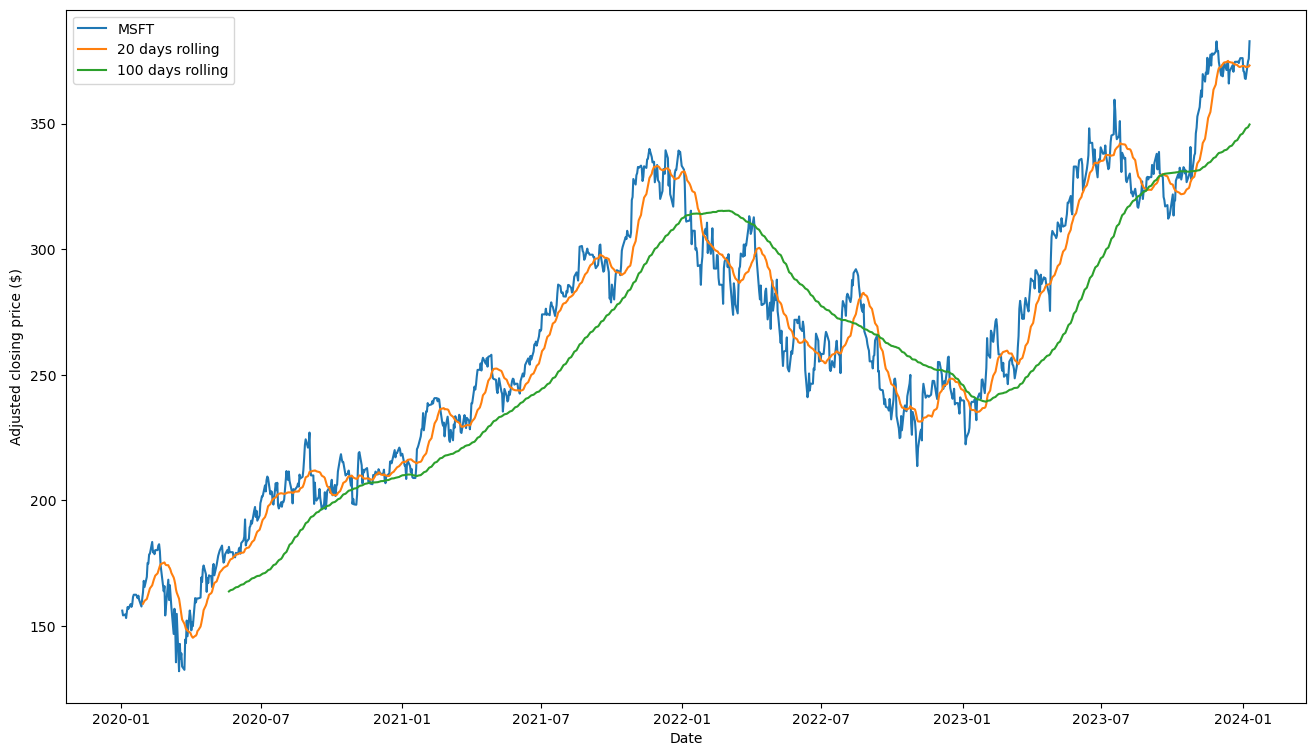

In [33]:
msft = close.loc[:, 'MSFT']

short_rolling_msft = msft.rolling(window=20).mean()
long_rolling_msft = msft.rolling(window=100).mean()

fig,ax = plt.subplots(figsize=(16, 9))

ax.plot(msft.index, msft, label='MSFT')
ax.plot(short_rolling_msft.index, short_rolling_msft, label='20 days rolling')
ax.plot(long_rolling_msft.index, long_rolling_msft, label='100 days rolling')

ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()

In [34]:
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')

In [38]:
short_rolling = close.rolling(window=20).mean()
short_rolling.head(100)

Symbols,AAPL,MSFT,SPY
2020-01-01,NaN,NaN,NaN
2020-01-02,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN
2020-01-06,NaN,NaN,NaN
2020-01-07,NaN,NaN,NaN
...,...,...,...
2020-05-13,71.488650,173.15640,274.30775
2020-05-14,71.779265,173.32610,274.59085
2020-05-15,72.095350,173.54805,274.57450
2020-05-18,72.572745,174.02900,275.22105


In [40]:
long_rolling = close.rolling(window=100).mean()
long_rolling.tail()

Symbols,AAPL,MSFT,SPY
2024-01-04,182.9460,347.50405,445.5357
2024-01-05,183.0129,348.01675,445.8499
2024-01-08,183.1101,348.54485,446.2025
2024-01-09,183.1892,349.07815,446.5598
2024-01-10,183.2395,349.63585,446.8946


In [42]:
# Relative returns
returns = close.pct_change(1)
returns.head()

Symbols,AAPL,MSFT,SPY
2020-01-01,NaN,NaN,NaN
2020-01-02,NaN,NaN,NaN
2020-01-03,-0.009690,-0.012278,-0.007586
2020-01-06,0.007910,0.002574,0.003790
2020-01-07,-0.004656,-0.009249,-0.002785


In [47]:
log_returns = np.log(close).diff()
log_returns.head()

Symbols,AAPL,MSFT,SPY
2020-01-01,NaN,NaN,NaN
2020-01-02,NaN,NaN,NaN
2020-01-03,-0.009737,-0.012354,-0.007615
2020-01-06,0.007878,0.002571,0.003782
2020-01-07,-0.004667,-0.009292,-0.002789


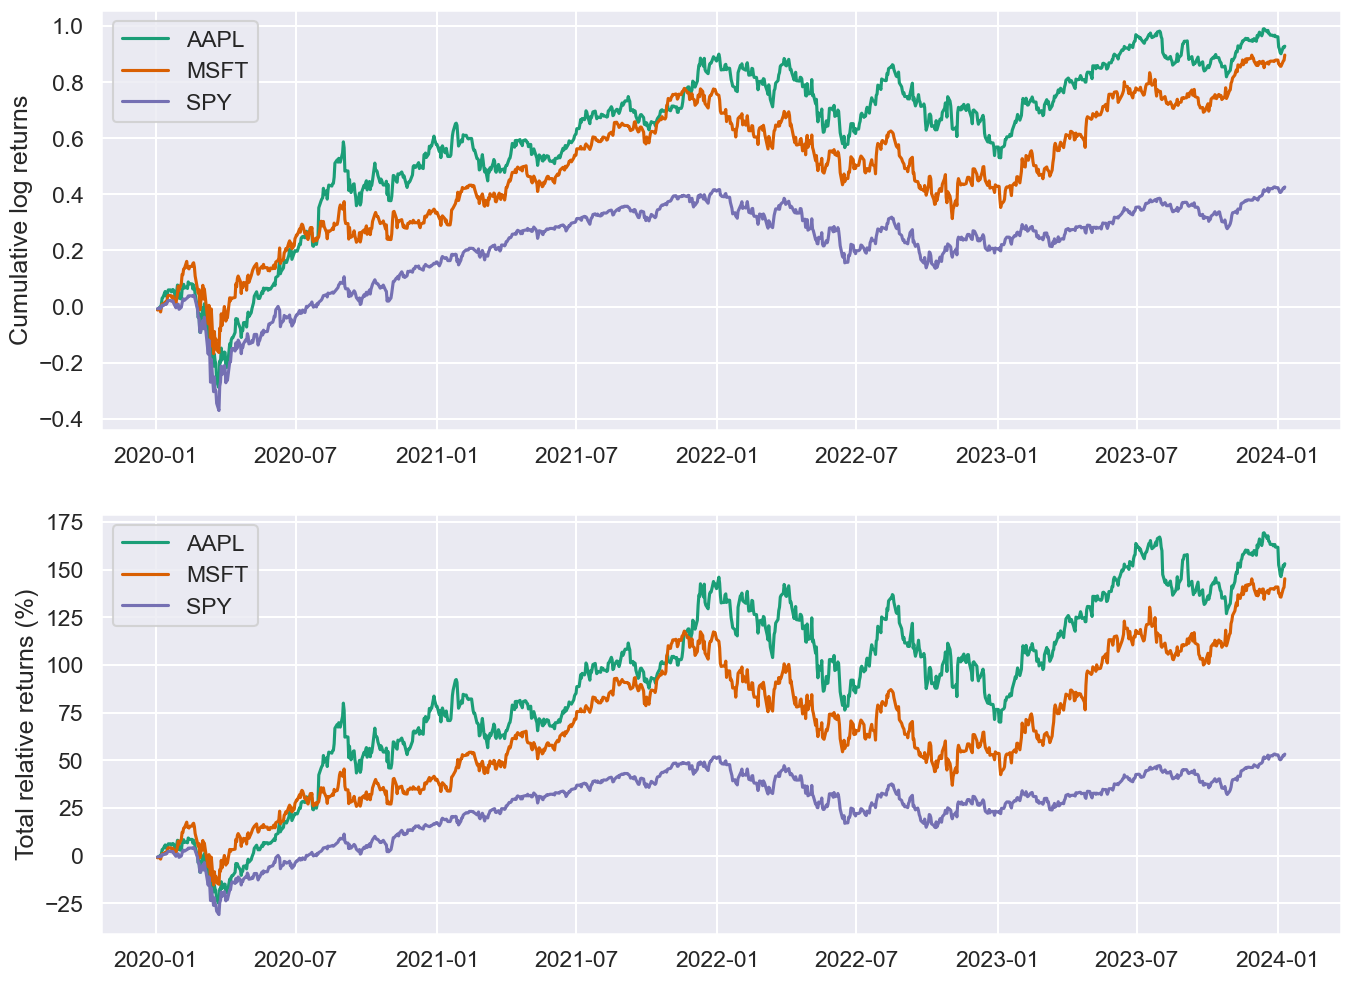

In [48]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12))

for c in log_returns:
    ax1.plot(log_returns.index, log_returns[c].cumsum(), label=str(c))
    
ax1.set_ylabel('Cumulative log returns')
ax1.legend(loc='best')

for c in log_returns:
    ax2.plot(log_returns.index, 100*(np.exp(log_returns[c].cumsum()) - 1), label=str(c))
    
ax2.set_ylabel('Total relative returns (%)')
ax2.legend(loc='best')

plt.show()

In [49]:
# last day returns. Make this a column vector.

r_t = log_returns.tail(1).transpose()
r_t

,2024-01-10
Symbols,
AAPL,0.005441
MSFT,0.018404
SPY,0.005535


In [50]:
weights_vector = pd.DataFrame(1/3, index=r_t.index, columns=r_t.columns)
weights_vector

,2024-01-10
Symbols,
AAPL,0.333333
MSFT,0.333333
SPY,0.333333


In [51]:
# total log_return for the portfolio is:
portfolio_log_return = weights_vector.transpose().dot(r_t)
portfolio_log_return

,2024-01-10
2024-01-10,0.009793


In [53]:
weights_matrix = pd.DataFrame(1/3, index=close.index, columns=close.columns)
weights_matrix.tail()

Symbols,AAPL,MSFT,SPY
2024-01-04,0.333333,0.333333,0.333333
2024-01-05,0.333333,0.333333,0.333333
2024-01-08,0.333333,0.333333,0.333333
2024-01-09,0.333333,0.333333,0.333333
2024-01-10,0.333333,0.333333,0.333333


In [54]:
temp_var = weights_matrix.dot(log_returns.transpose())
temp_var.head().iloc[:, 0:5]

,2020-01-01,2020-01-02,2020-01-03,2020-01-06,2020-01-07
2020-01-01,NaN,NaN,-0.009902,0.004744,-0.005583
2020-01-02,NaN,NaN,-0.009902,0.004744,-0.005583
2020-01-03,NaN,NaN,-0.009902,0.004744,-0.005583
2020-01-06,NaN,NaN,-0.009902,0.004744,-0.005583
2020-01-07,NaN,NaN,-0.009902,0.004744,-0.005583


In [55]:
# the numpy np.diag function is used to extract the diagonal and then
# a Series is constructed using the time information from the log_returns index

portfolio_log_returns = pd.Series(np.diag(temp_var), index=log_returns.index)
portfolio_log_returns.tail()

2024-01-04   -0.007737
2024-01-05   -0.001056
2024-01-08    0.018919
2024-01-09   -0.000284
2024-01-10    0.009793
Freq: B, dtype: float64

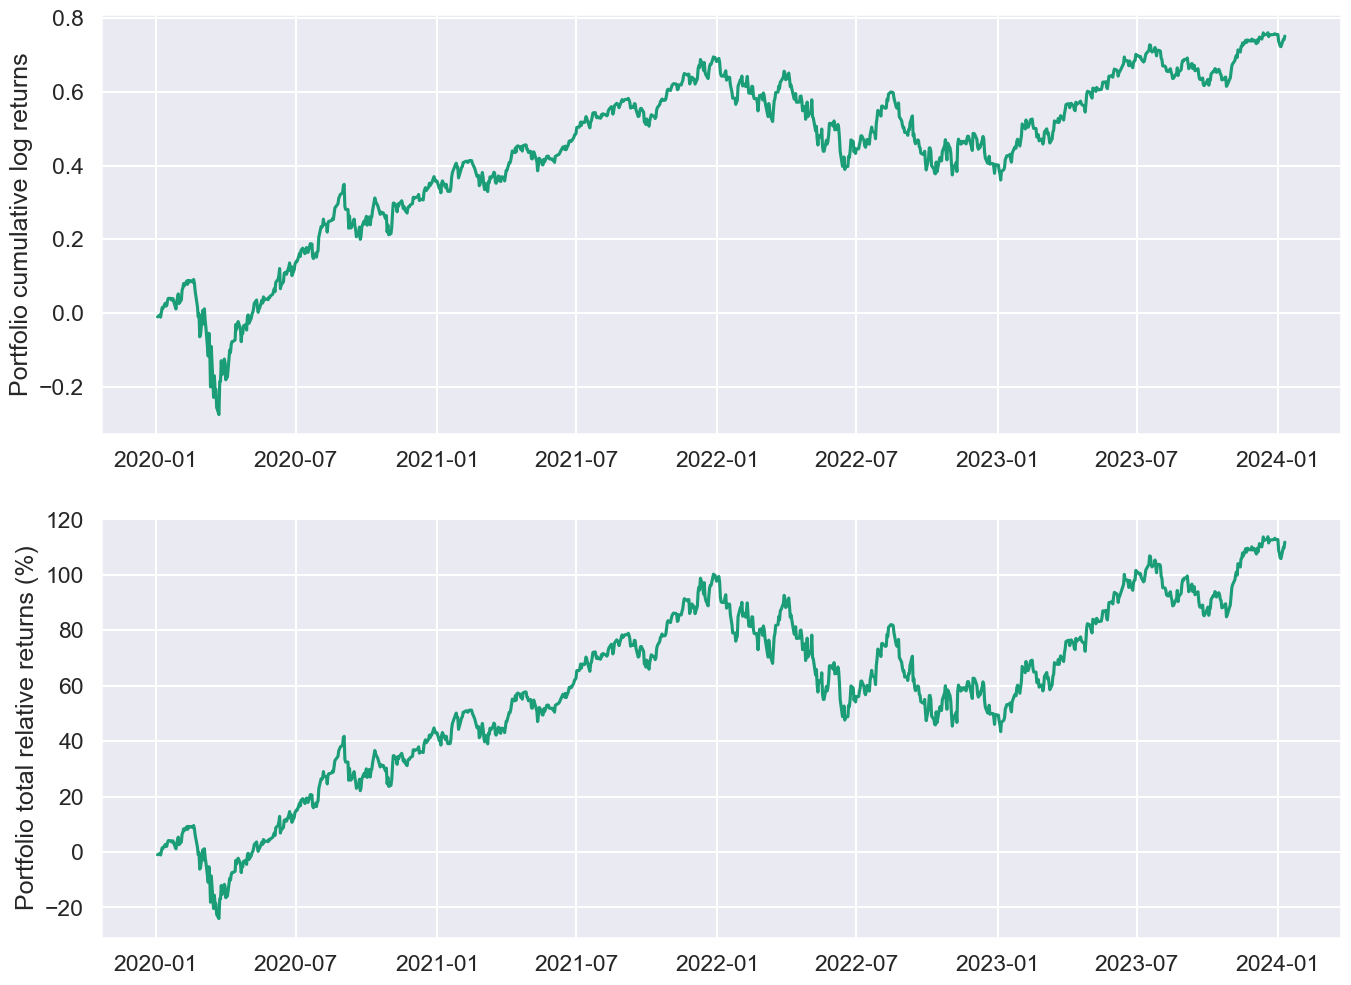

In [56]:
total_relative_returns = (np.exp(portfolio_log_returns.cumsum()) - 1)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12))

ax1.plot(portfolio_log_returns.index, portfolio_log_returns.cumsum())
ax1.set_ylabel('Portfolio cumulative log returns')

ax2.plot(total_relative_returns.index, 100 * total_relative_returns)
ax2.set_ylabel('Portfolio total relative returns (%)')

plt.show()

In [57]:
# calculating the time-related parameters of the simulation
days_per_year = 52 * 5
total_days_in_simulation = close.shape[0]
number_of_years = total_days_in_simulation / days_per_year

# the last data point will give us the total portfolio return
total_portfolio_return = total_relative_returns[-1]

# average portfolio return assuming compunding of returns
average_yearly_return = (1 + total_portfolio_return)**(1/number_of_years) - 1

print('Total portfolio return is: {:5.2f}'.format(100 * total_portfolio_return) + '%')
print('Average yearly return is: {:5.2f}'.format(100 * average_yearly_return) + '%')

Total portfolio return is: 111.81%
Average yearly return is: 20.40%


In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

sns.set(style='darkgrid', context='talk', palette='Dark2')

my_year_month_fmt = mdates.DateFormatter('%m/%y')

In [2]:
# change CWD to the current directory of jupyter notebook
DATA_FILE_PATH = 'C:\\Users\\houzhe\\jupyter\\GitHub\\StockAverageMoveAnalysis\\StockAverageMoveAnalysis'
DATA_TITLE = 'NDX'
os.chdir(DATA_FILE_PATH)

price_df = pd.read_csv('NDX_HistoricalData.csv')
price_df.head()

,Date,Close/Last,Open,High,Low
0,01/02/2024,16543.94,16667.30,16686.60,16453.15
1,12/29/2023,16825.93,16902.44,16919.51,16757.89
2,12/28/2023,16898.47,16963.52,16969.17,16891.32
3,12/27/2023,16906.80,16896.14,16922.01,16859.55
4,12/26/2023,16878.46,16816.78,16907.51,16813.57


In [3]:
price_df.set_index('Date', inplace=True)
price_df.head()

,Close/Last,Open,High,Low
Date,,,,
01/02/2024,16543.94,16667.30,16686.60,16453.15
12/29/2023,16825.93,16902.44,16919.51,16757.89
12/28/2023,16898.47,16963.52,16969.17,16891.32
12/27/2023,16906.80,16896.14,16922.01,16859.55
12/26/2023,16878.46,16816.78,16907.51,16813.57


Text(0, 0.5, 'NDX')

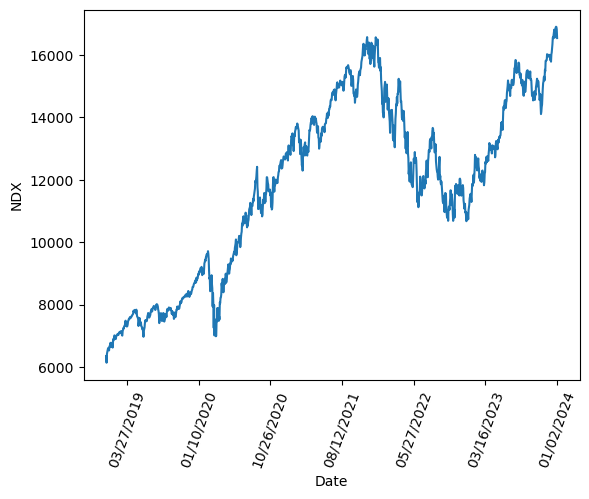

In [41]:
plt.gca().invert_xaxis()
price_df['Close/Last'].plot(rot=70);
plt.ylabel(DATA_TITLE)